<a href="https://colab.research.google.com/github/trewto/Enviroment_Study/blob/main/ipta_slope_analysis_method_lastedit_21_oct_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/research/Rainfall_1981-2022.xls', header=0)

In [ ]:
# prompt: get all row from df_city  Where Month =1 , and devide it two part the first half and last half

def convert_to_first_and_last_half(df_city):
  dataset = []
  # Filter rows where Month is 1
  for i in range(1,13):
    df_month = df_city[df_city['Month'] == i]

    # Calculate the midpoint of the filtered DataFrame
    midpoint = len(df_month) // 2

    # Split the DataFrame into two parts
    first_half = df_month.iloc[:midpoint]
    last_half = df_month.iloc[midpoint:]

    #print("First Half:")
    #print(first_half)
    sum_first_half = first_half['sum_1_to_31'].sum()

    sum_first_half = first_half['sum_1_to_31'].mean()

    std_first_half = first_half['sum_1_to_31'].std()
    #print(f"The sum of 'sum_1_to_31' for the first half is: {sum_first_half}")

    #print("\nLast Half:")
    #print(last_half)
    sum_last_half = last_half['sum_1_to_31'].sum()
    sum_last_half = last_half['sum_1_to_31'].mean()
    std_last_half = last_half['sum_1_to_31'].std()
    #print(f"The sum of 'sum_1_to_31' for the last half is: {sum_last_half}")
    dataset.append([i, sum_first_half, sum_last_half,std_first_half,std_last_half])

  df_dataset = pd.DataFrame(dataset, columns=['Month', 'Sum_First_Half', 'Sum_Last_Half','std_First_Half','std_Last_Half'])
  print(df_dataset)
  return df_dataset






In [ ]:
import matplotlib.pyplot as plt

# Function to calculate slope between two points
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 != 0:
        return (y2 - y1) / (x2 - x1)
    else:
        return 0

def calculate_length(x1, y1, x2, y2):
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5



# Function to calculate slopes and plot IPTA
def plot_ipta(Month,data_first, data_last):
    #data_first_1 will be in first collam Name Sum_First_Half and data_last one will be in second collam and merged
    df = pd.concat([Month,data_first, data_last], axis=1)
    df.columns = ['Month','Sum_First_Half', 'Sum_Last_Half']

    # Calculate slopes and lengths
    slopes = []
    lengths= []


    for i in range(len(df)):



        if i ==  len(df) -1 :
          x1, y1 = df['Sum_First_Half'].iloc[i], df['Sum_Last_Half'].iloc[i]
          x2, y2 = df['Sum_First_Half'].iloc[0], df['Sum_Last_Half'].iloc[0]
          slope = calculate_slope(x1, y1, x2, y2)
          length  = calculate_length(x1, y1, x2, y2)

          slopes.append(slope)
          lengths.append(length)



        else:
          x1, y1 = df['Sum_First_Half'].iloc[i], df['Sum_Last_Half'].iloc[i]
          x2, y2 = df['Sum_First_Half'].iloc[i + 1], df['Sum_Last_Half'].iloc[i + 1]
          slope = calculate_slope(x1, y1, x2, y2)
          length  = calculate_length(x1, y1, x2, y2)
          slopes.append(slope)
          lengths.append(length)

    # Add None for the first slope (no previous point)
    #slopes = [None] + slopes
    slopes = slopes

    # Add slopes to the DataFrame
    df['Slopes'] = slopes
    df['Length'] = lengths

    # Plot IPTA
    plt.figure(figsize=(10, 6))
    plt.plot(df['Sum_First_Half'], df['Sum_Last_Half'], marker='o', linestyle='--', color='b', label='Rainfall Data')

    # Plot month names beside each point
    for i in range(len(df)):
        plt.text(df['Sum_First_Half'].iloc[i], df['Sum_Last_Half'].iloc[i],
                 f"{df['Month'].iloc[i]}", fontsize=9, ha='right')

    # Plot slopes
    #for i in range(len(df) - 1):
    #    plt.text((df['Sum_First_Half'].iloc[i] + df['Sum_First_Half'].iloc[i + 1]) / 2,
    #              (df['Sum_Last_Half'].iloc[i] + df['Sum_Last_Half'].iloc[i + 1]) / 2,
     #             f"Slope: {round(slopes[i + 1], 2)}", fontsize=9, color='green')

    # Plot 45-degree reference line
    plt.plot([df['Sum_First_Half'].min(), df['Sum_First_Half'].max()],
             [df['Sum_First_Half'].min(), df['Sum_First_Half'].max()],
             'r--', label='45-degree line')

    plt.title('IPTA Polygon Plot')
    plt.xlabel('First Half  ')
    plt.ylabel('Last Half  ')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(df)



**Making Function CTWISE**

In [ ]:
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/research/Rainfall_1981-2022.xls', header=0)

In [ ]:
df.loc[:, 1:31] = df.loc[:, 1:31].apply(pd.to_numeric, errors='coerce')
df['sum_1_to_31'] = df.loc[:, 1:31].sum(axis=1)
#df.head()
df = df[['Stati','Year', 'Month', 'sum_1_to_31']]

In [ ]:
unique_city = (df['Stati'].unique())

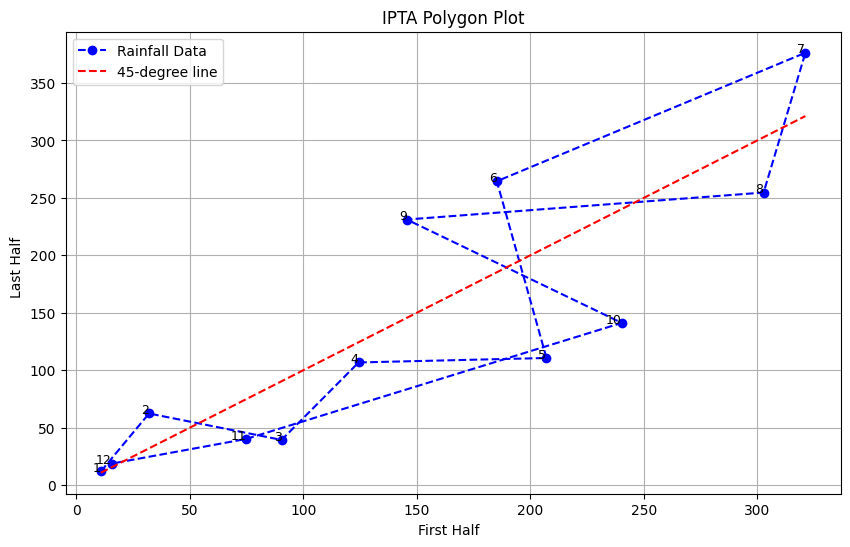

    Month  Sum_First_Half  Sum_Last_Half    Slopes      Length
0       1       10.843914      12.019231  2.373150   54.659916
1       2       32.069122      62.389827 -0.394086   62.731387
2       3       90.432006      39.389810  1.986017   75.464966
3       4      124.370663     106.792545  0.046988   82.856749
4       5      207.136095     110.681525 -7.030652  155.343623
5       6      185.261064     264.477247  0.822723  176.025712
6       7      321.194430     376.312712  6.604774  123.042524
7       8      302.775023     254.656688  0.149362  158.946327
8       9      145.572531     231.176659 -0.949995  130.638334
9      10      240.285485     141.199825  0.610402  193.764426
10     11       74.897676      40.246739  0.362112   62.957360
11     12       15.701835      18.811218  1.398126    8.350478


In [ ]:
i = 0
for city in unique_city:
    if city in ['          Daily  total  Rainfall  data  in  Millimeter  ', 'Stati', np.nan]:
        continue
    print (i,city)

    df_city = df[df['Stati'] == city]
    df_city = df_city[['Year', 'Month', 'sum_1_to_31']]



    df_dataset = convert_to_first_and_last_half(df_city)

    plot_ipta(df_dataset['Month'],df_dataset['Sum_First_Half'],df_dataset['Sum_Last_Half'])


    print( "Plot Rainfall std")
    plot_ipta(df_dataset['Month'],df_dataset['std_First_Half'],df_dataset['std_Last_Half'])

    print("========================")
    i= i+1
